In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MDS

In [ ]:
# Loading the dataset to perform multidimensional scaling.
df_MDS = pd.read_excel('/content/MMLA_EndTerm PGPM 2022.xlsx', sheet_name='Brands', index_col='Similarities')

In [ ]:
df_MDS

,Aqua-Fresh,Crest,Colgate,Gleem,Plus White,Ultra Brite,Close-Up,Pepsodent,Sensodyne
Similarities,,,,,,,,,
Aqua-Fresh,0,6,7,3,3,3,3,2,1
Crest,6,0,7,3,4,2,3,2,3
Colgate,7,7,0,5,4,2,3,2,5
Gleem,3,3,5,0,5,6,6,7,4
Plus White,3,4,4,5,0,5,6,7,4
Ultra Brite,3,2,2,6,5,0,6,7,4
Close-Up,3,3,3,6,6,6,0,7,5
Pepsodent,2,2,2,7,7,7,7,0,4
Sensodyne,1,3,5,4,4,4,5,4,0


Index(['Aqua-Fresh', 'Crest', 'Colgate', 'Gleem', 'Plus White', 'Ultra Brite',
       'Close-Up', 'Pepsodent', 'Sensodyne'],
      dtype='object')
[[ 0.05830677  0.38300181]
 [ 0.33625364 -0.01867796]
 [-0.2854613  -0.27410619]
 [-0.29198147  0.14837084]
 [ 0.31845845  0.29219309]
 [-0.28790822  0.38472563]
 [ 0.59591347 -0.42523942]
 [-0.30325863 -0.56866093]
 [-0.10627702 -0.01939162]]
Sklearn stress:1.0390428686322228
This stress value is not normalized


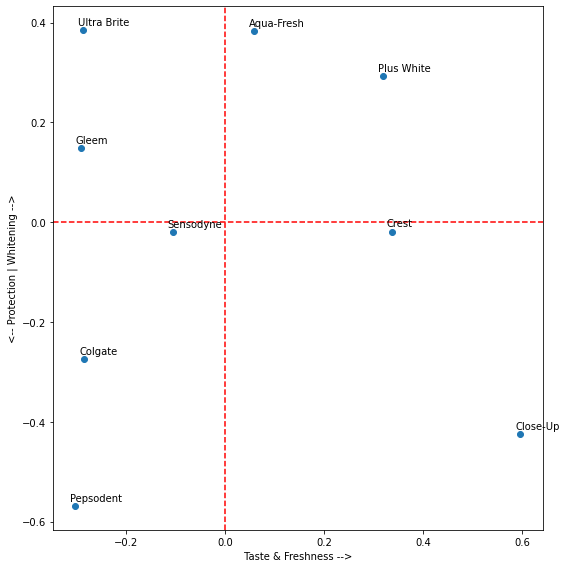

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

#Create the MDS using 2 components and use the pre computed matrix as an input.
# We'll be running a non-metric MDS as the data is ordinal in nature.
mds = manifold.MDS(n_components=2, metric=False, dissimilarity='precomputed', random_state=42)
results = mds.fit(df_MDS.values) #Converts pandas to numpy array

# Give the names of the columns to the variable toothpastes which is
# used for labelling the preceptual maps later on.
toothpaste = df_MDS.columns
print(toothpaste)

# These are the final coordinates for the various toothpastes that comes after MDS.
coords = results.embedding_
print(coords)

#Sklearn Stress - Kruskal's stress
stress = mds.stress_
print('Sklearn stress:{}'.format(stress))
print('This stress value is not normalized')

# To normalize the stress you have to divide by sum of Dij^2
#Plotting the figures

fig = plt.figure(figsize=(8,8))
plt.scatter(coords[:,0],coords[:,1])

for label,x,y in zip(toothpaste, coords[:,0], coords[:,1]):
  plt.annotate(
      label,
      xy = (x,y),
      xytext = (-5,5),
      textcoords = 'offset points'
  )
plt.xlabel(' Taste & Freshness --> ')
plt.ylabel(' <-- Protection | Whitening --> ')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# On running our MDS, we can see that the different brand of toothpastes are scattered across our 2-D plot.
# We can define our X & Y axis for easy interpretation of the dataset.
# The X axis can be function of Taste & Freshness where when we move from left to right, we move towards the brand of toothpastes which are
# positioning themselves for Taste & Freshness whereas Y axis can be function of Protection/Whitening where brands which are at the lower
# end of Y axis are positioning their toothpaste brand for Protection against cavities whereas brand at higher end of Y axis are positioning
# themselves as teeth whitening brands.

--------------------------------------------------------------------------------------------------END---------------------------------------------------------------------------------------------------------------------------